# Getting started with FUCCIphase

This notebook is a minimal, end-to-end example of how to use **FUCCIphase**:

- load a TrackMate XML file,
- apply a FUCCI sensor to convert fluorescence intensities into cell-cycle phase,
- inspect the resulting table and some basic plots.

Use this notebook if you are new to FUCCIphase and want to understand the
standard workflow on a small example dataset.



In [2]:
import json

import matplotlib.pyplot as plt
import pandas as pd

from fucciphase import process_dataframe
from fucciphase.plot import plot_normalized_intensities
from fucciphase.sensor import FUCCISASensor

In [6]:
df = pd.read_csv("../example_data/example_data_tempophase.csv")

# Sensor information

We load information about the cell cycle sensor.
This information has been manually obtained (see [this notebook](sensor_calibration.ipynb)).

In [7]:
with open("../example_data/fuccisa_tempophase.json") as fp:
    sensor_properties = json.load(fp)
sensor = FUCCISASensor(**sensor_properties)

## Process the DataFrame

Go through the dataframe and assign the cell cycle phase.
Also, the cell cycle percentage estimated from the intensity pairs is assigned.

In [8]:
process_dataframe(
    df,
    channels=["cyan", "magenta"],
    sensor=sensor,
    thresholds=[0.1, 0.1],
    use_moving_average=False,
)

## Plot the intensities over the true and the estimated percentage

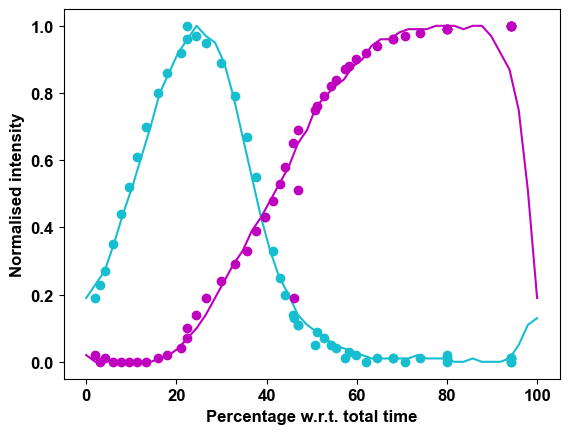

In [9]:
plot_normalized_intensities(
    df,
    "cyan",
    "magenta",
    "tab:cyan",
    "m",
    time_column="percentage",
    time_label="Percentage w.r.t. total time",
)
plot_normalized_intensities(
    df,
    "cyan",
    "magenta",
    "tab:cyan",
    "m",
    time_column="CELL_CYCLE_PERC",
    time_label="Percentage w.r.t. total time",
    marker="o",
    linestyle="",
)
plt.show()

# Plot the expected versus estimated cell cycle percentage

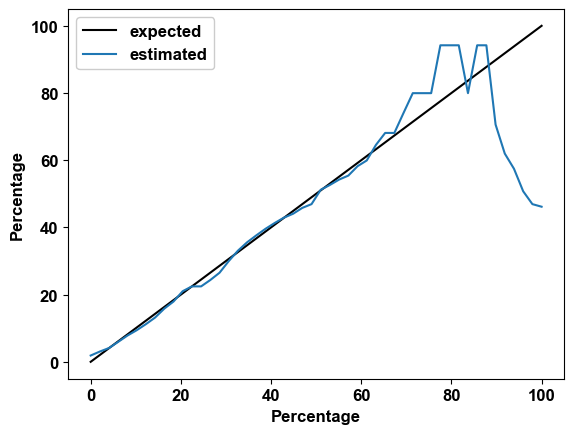

In [10]:
plt.plot(df["percentage"], df["percentage"], color="black", label="expected")
plt.plot(df["percentage"], df["CELL_CYCLE_PERC"], label="estimated")
plt.xlabel("Percentage")
plt.ylabel("Percentage")
plt.legend()
plt.show()